<a href="https://colab.research.google.com/github/con11235/covid19_visualize/blob/master/markdown/%EC%A2%85%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part.0. 도입
## 분석의 목적 및 흐름
안녕하세요, 팀 클릭입니다. 코로나 발생 이후 사회에 생긴 변화는 새로운 소비 트렌드가 등장했다는 점입니다. 우리는 이와 관련한 데이터를 분석하고 파악함으로써 이러한 트렌드를 가장 적극적으로 반영할 수 있는 산업이 무엇인지를 찾고자 합니다.  
 
코로나로 인해 생긴 가장 큰 변화를 떠올려보면 다음과 같은 두 특징이 있습니다.  
 
첫 번째, 코로나로 인해 발생한 여러 소비 트렌드들로 인해 사람들이 주로 소비하는 산업 자체가 달라졌다는 점입니다.  
![코로나19와 5대 소비 트렌드 이미지](https://i.ibb.co/VVfwcS0/1.png)  
집에서 보내는 시간의 증가로 집 안에서의 다양한 의식주 라이프스타일과 여가생활을 추구하는 '홈코노미', 인간 본원적 가치를 중시하는 현상으로 인해 불안감 및 두려움 등의 심리를 위안하는 '불안케어', 나를 위한 자기중심적 소비인 '에고이즘' 등이 대표적인 예입니다[(참고 기사)](http://m.joseilbo.com/news/view.htm?newsid=402010#_enliple). 우리는 소비 트렌드의 변화로 영향을 받았을 산업을 찾고자 하였고, 이를 위해 카드 소비 데이터를 분석하기로 하였습니다.  
 
두 번째, 대면 접촉이 꺼려짐으로 인해 비대면 방식의 생활이 확산되었습니다. 우리가 이러한 비대면 생활에 쉽게 적응될 수 있었던 것은 스마트폰이나 인터넷의 힘이 큽니다. 이로 미루어 보아, 사람들이 코로나 이후로 관심이 높아진 산업이 무엇인지를 찾기 위한 답은 스마트폰 안에 있을 것입니다. 우리는 이를 찾기 위해 스마트폰 앱의 순위 데이터를 장르별로 분석하기로 하였습니다.

즉, 우리는 코로나로 인한 소비 및 흥미의 변화를 파악하여 트렌드가 반영된 유망 산업을 찾는 방식으로 데이터를 분석해보았습니다.  
 
이후의 설명에는 필수적인 코드와 결과만을 포함하며 전체 코드에 대한 정보는 [깃허브 링크](https://github.com/con11235/covid19_visualize)에서 확인할 수 있습니다.

## 코로나 확진자 데이터의 분석  




우선 전국적으로 코로나 자체의 발생 동향을 파악하기 위해 코로나 확진자 수의 추이 그래프를 그려보았습니다.  
2월 중순에서 말 사이에 확진자수가 점차 증가하기 시작하였으며 3월에 최고점을 찍고, 사회적 거리두기 캠페인이 진행되었던 4월중에 코로나 확진자 수가 줄다가 캠페인이 종료된 시점의 1~2주(잠복기) 이후 다시 증가하여 그 수가 일정선을 유지하고 있음을 알 수 있습니다.

In [ ]:
patientinfo=pd.read_csv('/content/gdrive/My Drive/dacon/COVID_19/PatientInfo.csv')
patientinfo.head(3)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,서울,강서구,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,서울,중랑구,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,서울,종로구,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released


In [ ]:
fig=px.bar(case,x='date',y='daily')
fig.update_layout(
    title={
        'text': "확진자 추이(전국)",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

주어진 데이터 내에 한계가 있다보니 우리는 분석 대상을 서울시로 한정지어야한다고 생각하였고, 그렇게 분석하는게 타당할지 전국 데이터와 비교해보았습니다.  
서울시의 누적확진자 수 그래프를 보면 확진자 수가 급증하는 시점이 전국 그래프와 유사한 것을 알 수 있었고, 우리는 분석 대상을 서울시로 한정짓기로 하였습니다.

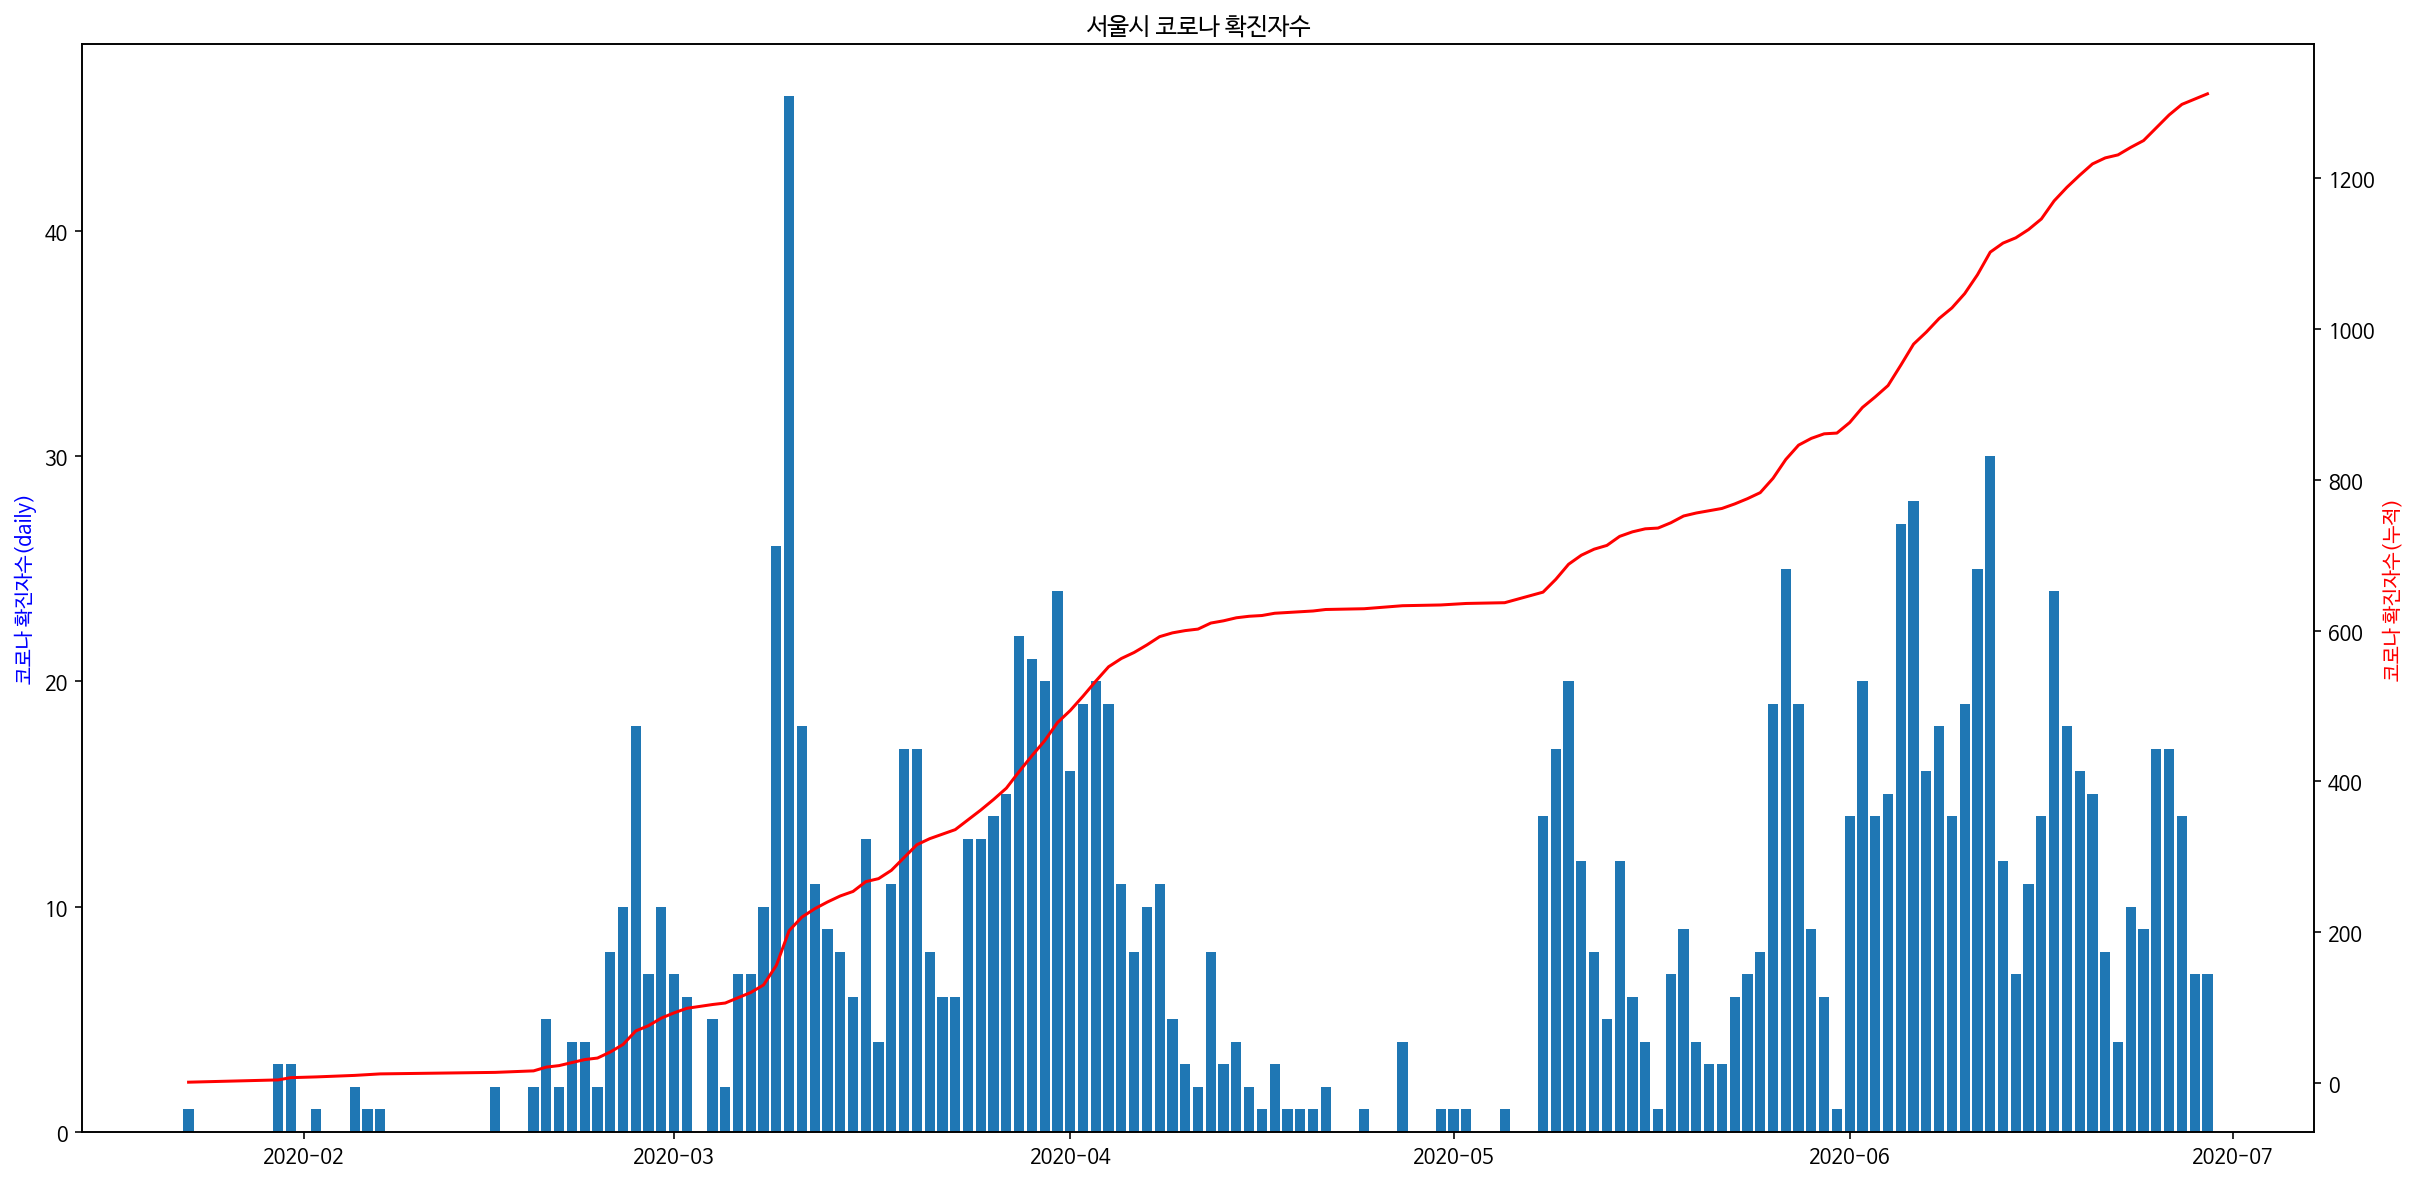

In [ ]:
fig,ax1=plt.subplots(figsize=(20, 10))

ax2=ax1.twinx()
ax1.bar(patient_s['confirmed_date'],patient_s['cnt'])
ax2.plot(patient_s['confirmed_date'],patient_s['cnt_sum'],color='r')

ax1.set_label('date')
ax1.set_ylabel('코로나 확진자수(daily)',color='b')
ax2.set_ylabel('코로나 확진자수(누적)', color='r')

plt.title('서울시 코로나 확진자수')

plt.show()

이후 진행할 분석에서 포스트 코로나로 판단할 시점을 찾기 위해 서울의 월별 신규 확진자 수를 확인하였습니다.  
전국 분포를 봤을 때 언급한 바와 같이 1,2월에 비해 3월에 확진자 수가 급증하였으며 거리두기 캠페인이 종료된 이후 점차 급증함을 보였습니다.


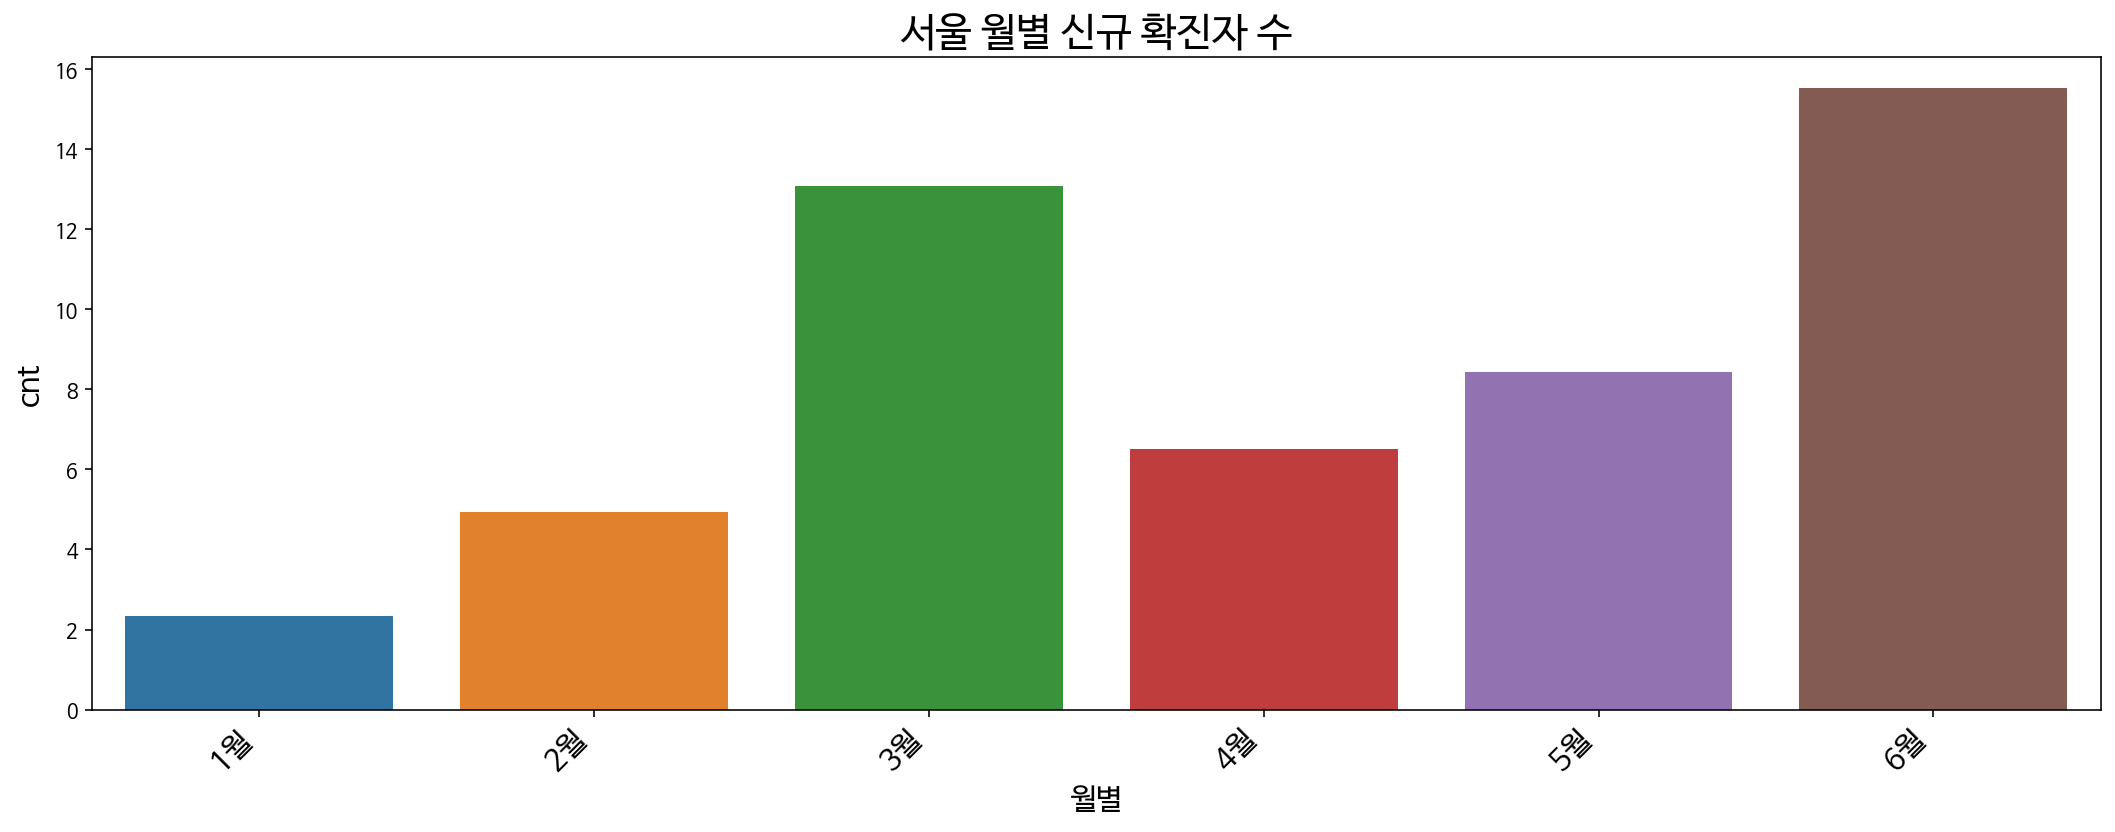

In [ ]:
plt.figure(figsize=(18, 6))
pal = sns.color_palette("Blues_d", patient_s.shape[0])
sns.barplot(data=patient_s, x='월', y='cnt',ci=None)


plt.title(f'서울 월별 신규 확진자 수', size=20)
plt.xticks(rotation=45, size=15, ha='right')
plt.xlabel('월별', size=15)
plt.ylabel('cnt', size=15)
plt.show()

좀 더 구체적인 시점을 찾기 위해 주단위로 데이터를 비교해본 결과, 확진자 수가 급증한 시점은 9주차로 볼 수 있습니다. 구체적인 일자는 일별 확진자수를 비교하여 결정하였으며, 그 결과 20년도 3월 10일까지는 코로나 이전의 시대, 3월 11일부터는 포스트 코로나 시대로 분류하도록 하였습니다.

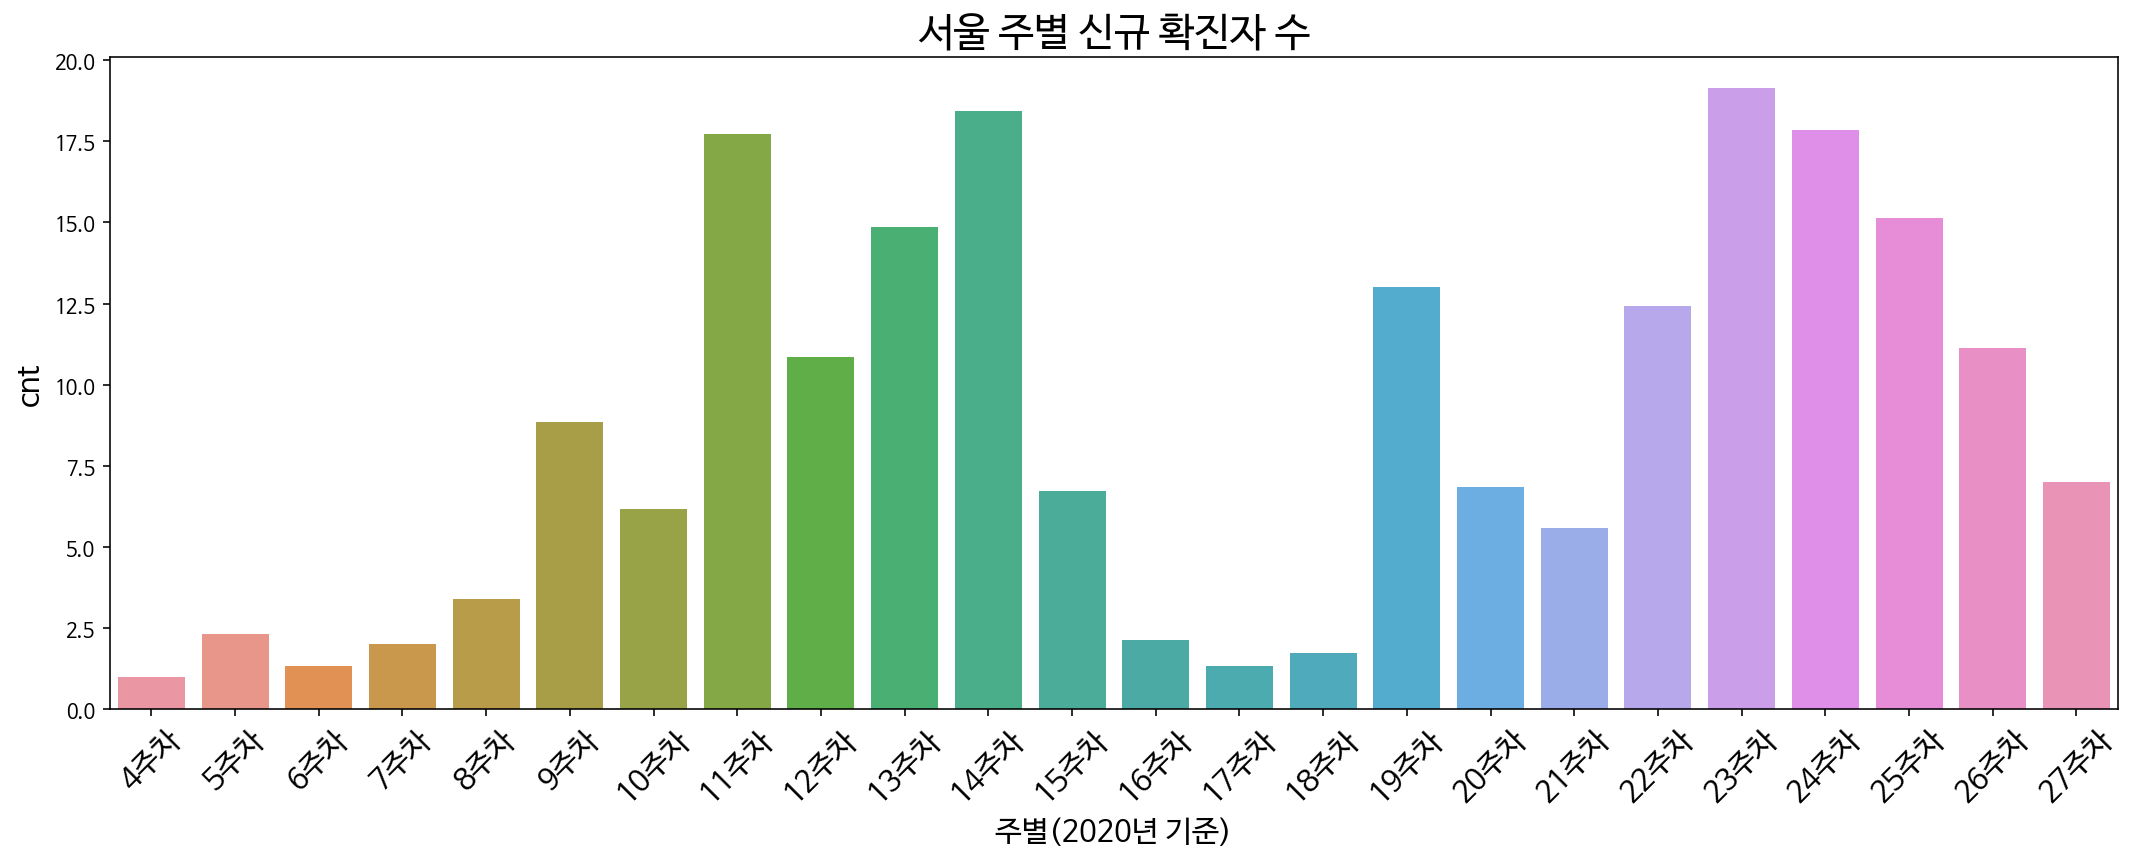

In [ ]:

plt.figure(figsize=(18, 6))
"""pal = sns.color_palette("Blues_d", patient_s.shape[0])
rank = patient_s['cnt'].argsort().argsort()"""
sns.barplot(data=patient_s, x='주차', y='cnt',ci=None)

"""plt.axvline(7, color='red', label='포스트코로나 시작 시점')
plt.axvspan(7, 26.5, facecolor='red', alpha=0.1)
plt.legend(fontsize=15)"""

plt.title(f'서울 주별 신규 확진자 수', size=20)
plt.xticks(rotation=45, size=15)
plt.xlabel('주별(2020년 기준)', size=15)
plt.ylabel('cnt', size=15)
plt.show()


## 유동인구의 변화 시각화
코로나 발생 전과 후의 유동인구의 변화와 확진자 수 간의 관계를 비교하기 위해 데이터를 지도로 시각화하였습니다.
먼저 각 구별 코로나 이전의 유동인구수 평균과 이후의 유동인구수 평균을 계산하였고, 그 차이를 diff값으로 하였습니다.

In [ ]:
fpopl_diff=fpopl_diff.sort_values(by=['diff'],ascending=False)
fpopl_diff.head()

,adstrd_code,covid_before,covid_after,diff,adstrd_name,latitude,longitude
4,11170,218.085938,196.987985,21.097953,서울특별시 용산구,37.532768,126.990021
10,11650,317.802200,302.648947,15.153254,서울특별시 서초구,37.483804,127.032693
18,11530,189.388577,175.724644,13.663933,서울특별시 구로구,37.495632,126.887650
1,11140,184.023932,176.336182,7.687749,서울특별시 중구,37.563988,126.997530
5,11560,236.304922,233.458827,2.846095,서울특별시 영등포구,37.526505,126.896190


diff값을 지도에 choropleth를 사용하여 표현하였습니다. 색이 진한 초록색에 가까울수록 코로나 이후에 유동인구가 많이 감소한 지역이고, 색이 옅은 초록에 가까울수록 코로나 이후 유동인구가 증가한 지역입니다.
유동인구가 표시된 지도 위에 지역별 확진자 수를 표시하여 유동인구와 확진자 사이의 관계를 볼 수 있도록 하였습니다.

In [ ]:
m = folium.Map(location=[37.55, 127], tiles="OpenStreetMap", zoom_start=10)
# Add the color for the chloropleth:

m.choropleth(
 geo_data=state_geo2,
 name='diff',
 data=fpopl_diff,
 columns=['adstrd_code', 'diff'],
 key_on='feature.properties.SIG_CD',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.5,
 legend_name='Population diff'
)
    

plugins.Fullscreen(position='topright',  # Full screen
                   title='Click to Expand', 
                   title_cancel='Click to Exit', 
                   force_separate_button=True).add_to(m)

plugins.MousePosition().add_to(m) ## you can easily get coordinates.

plugins.MarkerCluster(regional_count).add_to(m)

m


# Part.1. 카드 결제 건수를 통한 소비 변화 시각화
<br>
우선, 카드 결제 데이터(card.csv)를 통해 코로나로 인한 서울 지역의 소비가 어떻게 변화했는지 알아보겠습니다.<br>
유동인구의 변화가 큰 지역과 작은 지역 간에 소비 차이가 있을 것이라 생각한 저희 팀은 서울의 25개의 구 중 유동인구 변화가 큰 용산구, 서초구, 유동인구 변화가 작은 관악구, 강동구를 선택해 비교해보았습니다.

## 필요한 모듈 임포트 및 csv 파일 리드

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
card_01 = pd.read_csv(path[:-19]+"\\card_data\\df_card01.csv")
card_02 = pd.read_csv(path[:-19]+'\\card_data\\df_card02.csv')
card_03 = pd.read_csv(path[:-19]+'\\card_data\\df_card03.csv')
card_04 = pd.read_csv(path[:-19]+'\\card_data\\df_card04.csv')
card_05 = pd.read_csv(path[:-19]+'\\card_data\\df_card05.csv')
card_06 = pd.read_csv(path[:-19]+'\\card_data\\df_card06.csv')

card 파일이 용량이 커 월별로 분류해 리드한 후, 다시 하나로 합쳤습니다.

In [ ]:
card = pd.concat([card_01, card_02, card_03, card_04, card_05, card_06], ignore_index= True)
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463.0,5843230.0
1,20200104,1174066000,성내3동,7022,치과의원,33.0,7835550.0
2,20200104,1174066000,성내3동,7021,한의원,53.0,4589800.0
3,20200104,1174066000,성내3동,7020,의원,339.0,9267240.0
4,20200104,1174066000,성내3동,6110,자동차정비,19.0,4441000.0


## 데이터 가공

먼저, card 데이터를 구별로 분류하기 위해 adstrd_code를 구를 의미하는 행정동 코드 앞 5자리로 바꿔주었습니다.<br>
(1174066000 -> 11740)

In [ ]:
#20200101->2020-01-01
card['receipt_dttm']=card['receipt_dttm'].astype(str)
card['receipt_dttm']=card['receipt_dttm'].apply(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:])

#datetime으로
card['receipt_dttm']=pd.to_datetime(card['receipt_dttm'])

#월, 주차, 표시
card['주차']=card['receipt_dttm'].dt.weekofyear
card['월']=card['receipt_dttm'].dt.month
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,주차,월
0,2020-01-04,1174066000,성내3동,7041,약국,463.0,5843230.0,1,1
1,2020-01-04,1174066000,성내3동,7022,치과의원,33.0,7835550.0,1,1
2,2020-01-04,1174066000,성내3동,7021,한의원,53.0,4589800.0,1,1
3,2020-01-04,1174066000,성내3동,7020,의원,339.0,9267240.0,1,1
4,2020-01-04,1174066000,성내3동,6110,자동차정비,19.0,4441000.0,1,1


또한, 가맹점 업종코드 중 앞 두자리를 따와 분류기준으로 삼았습니다.<br>
(mrhst_induty_cl_code - 10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99)

이후, 각 분류에 품목명을 붙여주었습니다.

In [ ]:
induty_nm = pd.read_csv(path[:-19]+"\\card_data\\품목명.csv")
induty_nm.head()

,num,nm
0,10,숙박
1,11,교통수단
2,20,여가 용품
3,21,여가 장소
4,22,문화


## 데이터 시각화

함수 설명
* card_processing_visualize<br>
해당하는 구의 소비 변화를 시각화 하기위한 함수<br>
<br>
서울에서 코로나 확진자가 급증하기 시작한 3월을 기준으로 기간을 나누어 코로나 이전과 이후의 소비 변화를 시각화했습니다.<br>
코로나 이전에 해당하는 1, 2월 매출건수의 평균값을 구해 코로나 이후 기간의 주별 평균값과 비교했습니다.<br>
이후 계산한 상대값을 시간의 흐름에 따라 보여줍니다.

In [ ]:
def card_processing_visualize(card_name, ads,name):

    df=card_name[card_name['adstrd_code']==ads]
    
    is_week=df['주차']<=9
    card_before=df[is_week]
    card_after=df.drop(df[is_week].index)
    
    #1,2월 평균값 계산
    card_before=card_before.groupby(['mrhst_induty_cl_code'],as_index=False).selng_cascnt.mean()
    
    #품목별 평균값을 dict형태로 지정
    card_mean=dict()
    for i in range(len(card_before)):
        card_mean[card_before['mrhst_induty_cl_code'][i]]=card_before['selng_cascnt'][i]
    
    #3월부터 상대값 계산(2020년 9주차 부터)
    card_a=card_after.groupby(['주차','mrhst_induty_cl_code'],as_index=False).selng_cascnt.mean()
    
    #상대값 열로 생성
    add_col=[]
    for i in range(len(card_a)):
        mean=card_mean[card_a['mrhst_induty_cl_code'][i]]
        add=(card_a['selng_cascnt'][i]-mean)/mean
        add_col.append(add)
    card_a['corr']=add_col
    
    #품목명 지정
    induty=dict()
    for i in range(len(induty_nm)):
        induty[induty_nm['num'][i]]=induty_nm['nm'][i]

    add_col=[]
    for i in range(len(card_a)):
        add_col.append(induty[card_a['mrhst_induty_cl_code'][i]])
    card_a['induty_nm']=add_col
    
    #plot
    fig = px.bar(card_a, x="induty_nm", y="corr",color="induty_nm",
                 animation_frame="주차", animation_group="induty_nm", range_y=[-10,500])

    fig.update_layout(
        title={
            'text': "품목별 변화 추이-"+name,
            'y':1,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    fig.show()
    
    return

위의 함수를 이용해서 용산구, 서초구, 관악구, 강동구의 주별 카드 사용량 변화를 시각화해보았습니다.<br>
재생 버튼을 통해 실행 가능하며, 그래프는 10주차부터 24주차까지의 품목별 카드 사용량의 상대값을 나타냅니다.

## 1. 유동인구 변화가 큰 지역
### 1-1. 용산구의 상대값 변화

In [ ]:
# 용산구 상대값 : 11170
card_processing_visualize(card, 11170,'서울시 용산구')

KeyError: '주차'

용산구의 경우, 19주차 이전까지는 코로나의 여파로 대부분의 품목에서 값의 하락세를 보입니다.<br>
코로나가 잠잠해진 19주차(05/03-05/09)부터는 직물, 건축자재 등의 소비가 상승한 것을 확인할 수 있었습니다.<br>
하지만, 이태원 클럽과 관련해 코로나 확진자가 늘어나면서 22주 이후 다시 하락하는 경향을 보입니다.

### 1-2. 서초구의 상대값 변화

In [ ]:
# 서초구 상대값 : 11650
card_processing_visualize(card, 11650,"서울시 서초구")

서초구도 마찬가지로 19주차 이후부터 상승하며, 22주 이후 감소하는 경향을 보입니다.<br>
서초구의 경우, 미용, 건강식품, 건축자재, 주방, 가전, 직물 품목에서 소비가 크게 증가함을 확인하였습니다.<br>
<br>
유동인구 변화가 큰 두 개의 지역구에서 공통적으로 직물과 건축자재의 소비가 증가했습니다.<br>

## 2. 유동인구 변화가 작은 지역
### 2-1. 관악구의 상대값 변화

In [ ]:
# 관악구 상대값 : 11620
card_processing_visualize(card, 11620,"서울시 관악구")

유동인구 변화가 작은 지역인 용산구 또한 변화가 큰 지역과 유사하게 19주차를 시작으로 증가했다가 다시 감소하는 경향을 보입니다.<br>
소비가 크게 증가한 품목으로는 가구, 기타/교육이 있습니다.<br>
하지만, 유동인구가 큰 지역보다는 비교적 다양한 품목에서 소비가 증가했음을 알 수 있습니다.

### 2-1. 강동구의 상대값 변화

In [ ]:
# 강동구 상대값 : 11740
card_processing_visualize(card, 11740,"서울시 강동구")

NameError: name 'card_processing_visualize' is not defined

강동구 또한 앞의 세개 구와 마찬가지로 19주차 이후로 증가한 뒤 다시 감소하는 추세를 보였습니다.<br>
크게 증가한 품목으로는 가구, 건축자재, 전자, 기타/교육, 농업, 주방, 직물, 미용이 있습니다.<br>
<br>
유동인구 변화가 작은 용산구와 강동구는 가구, 기타/교육이 공통적으로 증가했으며, 비교적 다양한 항목에서 소비가 증가했습니다.

# Part.2 앱 순위 데이터를 통한 흥미 변화 시각화

코로나로 인한 사람들의 흥미 변화 및 유망 품목을 파악하기 위해 앱 데이터를 크롤링해서 분석해보았습니다.

* 앱 순위를 크롤링한 사이트는 [모바일 인덱스](https://www.mobileindex.com/) 입니다.

먼저, 기간별로 어플 순위를 가져왔습니다.


이때, **구글 플레이 스토어(안드로이드)**와 **앱 스토어(IOS)**를 구분지어 데이터를 크롤링했습니다.  

**기간**은 **2019년 1월 ~ 12월**과 **2020년 1월 ~ 6월**의 데이터를 가져왔습니다.

### 기간별 앱 순위와 장르 가져오기

* 설정 초기화 및 필요한 모듈 임포트

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!apt install chromium-chromedriver
!pip install selenium

from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

import warnings 
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (83.0.4103.61-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import numpy as np

먼저, 각 월말에 해당하는 데이터를 가져오기 위해 해당 사이트의 쿼리스트링을 활용하였습니다. 쿼리스트링을 변경하며 해당 날짜에 알맞은 데이터를 가져온 뒤, 해당 페이지의 소스를 받아옵니다.

이후 받아온 페이지 소스를 활용해 순위에 알맞은 앱 명과 장르를 가져오도록 함수로 구현하였습니다.

In [ ]:
genre_dic = {}

def makeUrl(dateList,i, kinds):
  if kinds == 'playstore': 
    url = 'https://www.mobileindex.com/app/get_rank_all?rt=r&mk=2&c=kr&t=app&rs=100&d=' + dateList[i]
  else:
    url = 'https://www.mobileindex.com/app/get_rank_all?rt=r&mk=1&c=kr&t=app&rs=100&d=' + dateList[i]
  return url

def getGenreUrl(url):
  driver = webdriver.Chrome('chromedriver',options=options)
  driver.get(url)

  html = driver.page_source
  soup = BeautifulSoup(html, 'html.parser')
  genreURL = soup.select('div.item-info > a')
  return genreURL

def get_genre(url,appname):
  if appname in genre_dic:
    return genre_dic[appname]
  dr = webdriver.Chrome('chromedriver',options=options)
  dr.get(url)
  ht = dr.page_source
  so = BeautifulSoup(ht, 'html.parser')
  genre = so.select('tr.text-center')[0].text
  index1 = genre.find('\n',1)
  if genre[index1+1] == '\n':
    genre_dic[appname] = '기타'
    return '기타'
  index2 = genre.find('\n',14)
  genre_dic[appname] = genre[(index1+1):index2]
  return genre[(index1+1):index2]
  
def separateAppRank(rank):
  free_rank = []
  pay_rank = []
  sales_rank = [] 
  for j in range(len(rank)):
    if len(rank[j]) == 100:
      free_rank.append(rank[j][0::2])
      pay_rank.append(rank[j][1::2])
    elif len(rank[j]) == 150 or len(rank[j]) == 300:
      free_rank.append(rank[j][0::3])
      pay_rank.append(rank[j][1::3])
      sales_rank.append(rank[j][2::3])
  return free_rank, pay_rank, sales_rank

def getAppRank(url, year):
  driver = webdriver.Chrome('chromedriver',options=options)
  driver.get(url)

  html = driver.page_source
  soup = BeautifulSoup(html, 'html.parser')
  notices = soup.select('span.appname')
  
  tmp = []
  for n in notices:
    tmp.append(n.text.strip())
  return tmp

위의 함수들을 활용하여, 연도와 기간, 그리고 스토어 종류별 알맞은 데이터 값들을 크롤링하였고, 이를 각각 list에 저장하였습니다.  

---

**함수 설명**
* makeUrl  
날짜와 스토어 종류, 날짜 인덱스 번호를 파라미터로 하여 알맞은 url를 만들어주는 함수

* getAppRank  
makeUrl를 통해 만든 url과 연도를 입력받아 해당 페이지의 순위별 어플명을 리스트에 저장하는 함수

* getGenreUrl  
makeUrl를 통해 만든 url를 이용하여 해당 태그에 속해있는 장르명을 순위 순서대로 받아오는 함수

* get_genre  
getGenreUrl로 만든 genre url를 활용하여 장르를 불러오는 함수. 클릭을 활용해야하기 때문에 selenium을 필수적으로 사용하였다.

* separateAppRank  
단순 크롤링을 통해 받아온 값들은 종류별 앱 순위가 아니므로 각 종류에 알맞은 값으로 분류하는 함수

---


위의 함수들을 활용하여 무료 앱은 무료 앱끼리, 유료는 유료끼리, 그리고 매출 순위까지 각각 합쳐 이후 데이터 분석을 위해 DataFrame으로 변환하는 과정을 거쳤습니다.

이 때 열 이름은 각 연도와 월 명을 언더바를 이용하여 19_1 과 같이 나타내었고, 장르는 19_1_genre 와 같이 나타내었습니다. 아래는 예시 코드의 일부입니다.

In [ ]:
col = []
for i in range(12):
  col.append('19_'+str(i+1))
  col.append('19_'+str(i+1)+'_gen')
for i in range(6):
  col.append('20_'+str(i+1))
  col.append('20_'+str(i+1)+'_gen')

appRank_free_playstore_df = pd.DataFrame(p_appRank_free)
appRank_free_playstore_df = appRank_free_playstore_df.T
appRank_free_playstore_df.columns = col
appRank_free_playstore_df.to_csv('appRank_free_playstore_2019.csv', encoding='utf-8-sig')

### 순위별 장르 점수 매기기 

데이터를 가져오는 작업이 끝났다면, 이제 데이터를 가공해야할 차례입니다.

사람들의 **흥미 변화 및 유망 품목을 파악하는 것**이 목표이기에, 각 앱 명이 아닌 앱의 장르를 기준으로 분석하였습니다.

순위별 점수를 장르에 매겨, 해당 장르의 합산 점수를 장르명과 점수의 딕셔너리 형태로 리스트에 저장합니다. 

이후, **2019년 1월 ~ 9월** 의 장르 점수 값들을 합산한 뒤 평균내어 **기준값**으로 설정하고, **2019년 10월부터 2020년 6월**의 장르 점수 값과, 기준값을 각각 비교합니다. 이 때 비교한 결과는 증감율로서 표현합니다.

2019년 10월의 데이터부터 증감율을 비교한 이유는 코로나 발생 기점인 2020년 1월을 기준으로 이전 3달의 변화 양상과 이후의 변화 양상을 확인하기 위해 10월부터 확인하였습니다.


* 먼저, 필요한 데이터를 불러옵니다. 이 csv 파일들은 모두 위의 장르 및 앱 순위 구하기를 통해 만든 데이터프레임을 csv로 저장한 파일입니다.

In [ ]:
appRank_free_playstore_19_df = pd.read_csv('/content/gdrive/My Drive/dacon/app/appRank_free_playstore_2019.csv')
appRank_free_appstore_19_df = pd.read_csv('/content/gdrive/My Drive/dacon/app/appRank_free_appstore_2019.csv')
appRank_pay_playstore_19_df = pd.read_csv('/content/gdrive/My Drive/dacon/app/appRank_pay_playstore_2019.csv')
appRank_pay_appstore_19_df = pd.read_csv('/content/gdrive/My Drive/dacon/app/appRank_pay_appstore_2019.csv')
appRank_free_playstore_20_df = pd.read_csv('/content/gdrive/My Drive/dacon/app/appRank_free_playstore_2020.csv')
appRank_free_appstore_20_df = pd.read_csv('/content/gdrive/My Drive/dacon/app/appRank_free_appstore_2020.csv')
appRank_pay_playstore_20_df = pd.read_csv('/content/gdrive/My Drive/dacon/app/appRank_pay_playstore_2020.csv')
appRank_pay_appstore_20_df = pd.read_csv('/content/gdrive/My Drive/dacon/app/appRank_pay_appstore_2020.csv')
appRank_sales_playstore_20_df = pd.read_csv('/content/gdrive/My Drive/dacon/app/app_sales_rank_playstore_2020.csv')
appRank_sales_appstore_20_df = pd.read_csv('/content/gdrive/My Drive/dacon/app/app_sales_rank_appstore_2020.csv')
appRank_sales_playstore_19_df = pd.read_csv('/content/gdrive/My Drive/dacon/app/app_sales_rank_playstore_2019.csv')
appRank_sales_appstore_19_df = pd.read_csv('/content/gdrive/My Drive/dacon/app/app_sales_rank_appstore_2019.csv')

장르별 점수는 총 1~50위까지 있는 경우에 1위인 장르는 50점, 50위인 장르는 1점으로 할당하였습니다.

이후 각 장르 점수를 합산하여 '장르명':점수 와 같은 딕셔너리 형태로 나타내었으며 이를 월별 장르 점수로 묶은 뒤, 해당 연도의 리스트에 추가하였습니다.

각 장르 점수가 담긴 연도별 리스트의 명은 다음과 같습니다.  
* free_p_gen_dic_19 / free_p_gen_dic_20
* pay_p_gen_dic_19 / pay_p_gen_dic_20
* sales_p_gen_dic_19 / sales_p_gen_dic_20
* free_a_gen_dic_19 / free_a_gen_dic_20
* pay_a_gen_dic_19 / pay_a_gen_dic_20
* sales_a_gen_dic_19 / sales_a_gen_dic_20

이후의 모든 변수명을 나타낼 때에도 위와 같은 형태로 나타내는데, 변수명 설정 규칙은 다음과 같습니다.

* 유료/ 무료: pay/ free
* 플레이스토어/ 앱스토어: p/ a or playstore/ appstore
* 연도명 : 19/ 20



#### 플레이스토어 무료

장르별 점수를 매긴 뒤, *free_p_gen_dic_19*를 이용하여 월별 장르의 점수가 담긴 *free_playstore_19*라는 데이터프레임을 생성하였습니다.

In [ ]:
free_playstore_19 = pd.DataFrame(free_p_gen_dic_19)
free_playstore_19 = free_playstore_19.T
free_playstore_19.columns = col
free_playstore_19 = free_playstore_19.drop([free_playstore_19.index[0]])
free_playstore_19.head()

,19_1,19_2,19_3,19_4,19_5,19_6,19_7,19_8,19_9,19_10,19_11,19_12
식음료,96,87,47,84,83,75,90,61,66,72,49,89
라이프스타일,0,0,22,2,51,49,35,59,18,0,20,0
사진,72,34,41,88,78,22,73,31,44,85,0,65
도구,165,311,228,225,174,106,136,157,185,134,203,88
여행 및 지역정보,59,88,69,120,90,104,117,92,108,108,147,158


아래는 기준값(이후 변수명 **base**)을 구하는 과정입니다. 19년 1~9월의 장르별 합산 값의 평균을 계산하여 average 열에 저장합니다. 

또한 20년 데이터의 장르명의 존재여부를 확인하기 위해 *free_p_standard_19*의 장르명을 genre라는 리스트에 저장합니다.

* free_p_standard_19  
19년 1~9월 기준값을 담은 Df

In [ ]:
free_p_standard_19 = free_p_standard_19[['average']]
free_p_standard_19 = free_p_standard_19.reset_index()
genre = list(free_p_standard_19['index'])
free_p_standard_19 = free_p_standard_19.set_index('index')
free_p_standard_19.head()

24


,average
index,
식음료,76.555556
라이프스타일,26.222222
사진,53.666667
도구,187.444444
여행 및 지역정보,94.111111


이제, *free_playstore_19*의 변수명으로 Df를 생성합니다. *free_playstore_19*는 앞서 월별 장르 점수로 가공되어있는 위의 *free_playstore_19*에서 19년 10~12월의 데이터만을 가져온 Df 입니다.  

19년도 10~12월의 데이터는 기준값과 비교해서 증감율을 계산해야하므로, 증감율 계산 과정을 거칩니다.  

증감율은 **(현재값 - 기준값) / 기준값**의 과정을 거쳐 계산하였습니다.  

증감율을 계산하면, 각 월을 나타내는 열에 해당 장르의 증감율이 저장될 수 있도록 나타내었으며, 이후 plot을 하기에 용이하도록 데이터프레임의 구조를 변경하여 *free_playstore_19_graph*에 저장하였습니다.  

이때 사용된 genre_list는 *free_playstore_19*의 장르명을 모아둔 리스트입니다.  

In [ ]:
free_playstore_19_graph = pd.DataFrame()
for i in range(3):
  free_playstore_19_fig = pd.DataFrame(genre_list,columns = ['genre'])
  free_playstore_19_fig['value'] = month[i]
  free_playstore_19_fig['month'] = str(i+10)+'월'
  free_playstore_19_fig = free_playstore_19_fig[['genre','month','value']]
  free_playstore_19_graph = pd.concat([free_playstore_19_graph,free_playstore_19_fig], axis = 0)

free_playstore_19_graph.head()

,genre,month,value
0,식음료,10월,-0.359942
1,라이프스타일,10월,-0.237288
2,사진,10월,-1.000000
3,도구,10월,0.082988
4,여행 및 지역정보,10월,0.561983


20년의 데이터도 위와 같은 과정을 거쳐, 최종적으로 *free_playstore_20_graph*의 Df로 나타내었습니다. 

* 과정이 위와 같으므로 코드는 간략하게 나타내었습니다.

In [ ]:
free_playstore_20.head()

,index,20_1,20_2,20_3,20_4,20_5,20_6
0,라이프스타일,31,97,0,0,38,0
1,사진,0,0,12,0,0,56
2,도구,137,135,92,208,134,227
3,지도/내비게이션,65,0,9,17,45,82
4,도서/참고자료,53,36,56,40,46,40


In [ ]:
free_playstore_20_graph = pd.DataFrame()
for i in range(6):
  free_playstore_20_fig = pd.DataFrame(genre_list,columns = ['genre'])
  free_playstore_20_fig['value'] = month[i]
  free_playstore_20_fig['month'] = str(i+1)+'월'
  free_playstore_20_fig = free_playstore_20_fig[['genre','month','value']]
  free_playstore_20_graph = pd.concat([free_playstore_20_graph,free_playstore_20_fig], axis = 0)

free_playstore_20_graph.head()

,genre,month,value
0,라이프스타일,1월,0.182203
1,사진,1월,-1.000000
2,도구,1월,-0.269117
3,지도/내비게이션,1월,0.069470
4,도서/참고자료,1월,0.133017


19년과 20년 데이터의 모든 전처리가 끝나 생성된 *free_playstore_19_graph* 와 *free_playstore_20_graph*를 concat하여 하나의 데이터프레임인 free_playstore_19_20_graph로 나타냅니다. 

컬럼 설명
* genre : 장르명
* month : 19.10 ~ 20.6월의 각 월
* value : 증감율

In [ ]:
free_playstore_19_20_graph = pd.concat([free_playstore_19_graph, free_playstore_20_graph], axis = 0)
free_playstore_19_20_graph.head()

,genre,month,value
0,식음료,10월,-0.359942
1,라이프스타일,10월,-0.237288
2,사진,10월,-1.000000
3,도구,10월,0.082988
4,여행 및 지역정보,10월,0.561983


plotly를 활용하여, 가장 변화를 알아보기 쉽도록 bar chart에 애니메이션을 적용하였습니다. 

시각화 결과는 다음과 같습니다.

In [ ]:
df = free_playstore_19_20_graph

fig = px.bar(df, x="genre", y="value", color="genre",
  animation_frame="month", animation_group="genre", range_y=[min(free_playstore_19_20_graph['value'])-5, max(free_playstore_19_20_graph['value'])+5])
fig.show()

### 데이터 시각화 결론 (플레이스토어 무료)
2019년 10-12월의 경우에는 비즈니스와 건강/운동이 10월에 조금 증가하였다가 이후에는 감소하여 모든 장르들이 별 추세를 보이지 않습니다.
이후 2020년의 증감율 추이를 보았을 때에는 2-5월을 지나며 **의료, 건강 운동, 비즈니스, 자동차, 교육** 관련 어플들이 기준값 대비 증가하는 추세를 보였고, **비즈니스**는 6월에서도 꾸준히 증가한 모습을 보였습니다. 


---


같은 방법으로 **플레이스토어 유료, 플레이스토어 매출, 앱스토어 무료, 앱스토어 유료, 앱스토어 매출** 도 동일하게 시각화를 진행하였습니다.

이 때, 다른 과정과 다른 점은 **플레이스토어 매출**입니다. 플레이스토어의 매출 자료는 2019년 10월부터 2020년 6월까지의 자료밖에 존재하지 않았기 때문에 앞서 설정한 기준이 아닌, 2019년의 데이터를 기준값으로 설정하고 2020년의 데이터를 증감율로서 비교하여 시각화하였습니다.

다른 모든 과정은 같은 과정이므로 의미없는 길어짐을 방지하기 위해 데이터 프레임과 시각화 결과만 나타내었습니다.

#### 플레이스토어 유료

In [ ]:
pay_playstore_19_20_graph.head()

,genre,month,value
0,도구,10월,-0.100592
1,사진,10월,-0.492272
2,맞춤 설정,10월,-0.558463
3,지도/내비게이션,10월,-1.000000
4,도서/참고자료,10월,-0.035714


In [ ]:
df = pay_playstore_19_20_graph

fig = px.bar(df, x="genre", y="value", color="genre",
  animation_frame="month", animation_group="genre", range_y=[min(pay_playstore_19_20_graph['value'])-5, max(pay_playstore_19_20_graph['value'])+5])
fig.show()

### 데이터 시각화 결론 (플레이스토어 유료)
2019년 10-12월의 경우에는 모든 어플들이 별다른 증가 추세를 보이지 않습니다. 
이후 2020년의 증감율 추이를 보았을 때에는 1월부터 **여행 및 지역정보, 엔터테인먼트, 라이프스타일, 자동차**가 증가 추세를 보이기 시작하여 이후 **소셜, 예술/디자인** 또한 증가 추세를 보입니다.
유료 어플의 경우에는 무료 어플에 비해 시대적 상황에 따른 변화가 크지 않고, 개인의 취향 및 라이프스타일의 영향을 받는 경향이 있다는 것을 확인할 수 있습니다.

#### 플레이스토어 매출

In [ ]:
sales_playstore_20_graph.head()

,genre,month,value
0,데이트,1월,0.550067
1,라이프스타일,1월,-0.013423
2,동영상 플레이어/편집기,1월,0.437500
3,스포츠,1월,0.704319
4,도서/참고자료,1월,0.363636


In [ ]:
df = sales_playstore_20_graph

fig = px.bar(df, x="genre", y="value", color="genre",
  animation_frame="month", animation_group="genre", range_y=[min(sales_playstore_20_graph['value'])-5, max(sales_playstore_20_graph['value'])+5])
fig.show()

### 데이터 시각화 결론 (플레이스토어 매출)
2020년의 경우에는 **금융, 만화**가 초반 증가 추세를 보였습니다. 이후에도 **금융**은 꾸준히 증가 추세를 6월까지 보이는 것을 확인할 수 있습니다.


#### 앱스토어 무료

In [ ]:
free_appstore_19_20_graph.head()

,genre,month,value
0,식음료,10월,-0.158654
1,라이프스타일,10월,0.223029
2,Finance,10월,-1.000000
3,Navigation,10월,-1.000000
4,어드벤처,10월,0.061135


In [ ]:
df = free_appstore_19_20_graph

fig = px.bar(df, x="genre", y="value", color="genre",
  animation_frame="month", animation_group="genre", range_y=[min(free_appstore_19_20_graph['value'])-5, max(free_appstore_19_20_graph['value'])+5])
fig.show()

### 데이터 시각화 결론 (앱스토어 무료)
2019년의 경우에는 별다른 변화가 없습니다. 2020년의 경우에는 **뉴스/잡지, 유틸리티, Navigation** 어플들이 주로 상승세를 보입니다. 4월 이후에는 **자동차 경주**게임 또한 상승 추세를 나타내었습니다.


#### 앱스토어 유료

In [ ]:
pay_appstore_19_20_graph.head()

,genre,month,value
0,Education,10월,-1.000000
1,라이프스타일,10월,-1.000000
2,Finance,10월,-0.071749
3,Medical,10월,84.500000
4,음악/오디오,10월,-1.000000


In [ ]:
df =pay_appstore_19_20_graph

fig = px.bar(df, x="genre", y="value", color="genre",
  animation_frame="month", animation_group="genre", range_y=[min(pay_appstore_19_20_graph['value'])-5, max(pay_appstore_19_20_graph['value'])+5])
fig.show()

### 데이터 시각화 결론 (앱스토어 유료)
2019년의 경우에는 **의료, 커뮤니케이션** 앱들의 큰 상승세가 나타납니다. 2020년에 들어서는 **커뮤니케이션, 도서** 등의 상승세를 확인할 수 있습니다.


#### 앱스토어 매출

In [ ]:
sales_appstore_19_20_graph.head()

,genre,month,value
0,기타,10월,42.500000
1,어드벤처,10월,-0.953528
2,사진,10월,-1.000000
3,캐주얼 게임,10월,0.094845
4,롤플레잉,10월,0.120666


In [ ]:
df = sales_appstore_19_20_graph

fig = px.bar(df, x="genre", y="value", color="genre",
  animation_frame="month", animation_group="genre", range_y=[min(sales_appstore_19_20_graph['value'])-5, max(sales_appstore_19_20_graph['value'])+5])
fig.show()

### 데이터 시각화 결론 (앱스토어 매출)
앱스토어 매출의 경우에는 **자동차 경주, 사진** 등의 몇가지 장르를 제외하고는 **기타** 장르의 점수 합이 컸으므로 별다른 비교가 어려웠습니다.


## 앱 데이터 시각화 결론

흥미 변화 및 유망 품목을 파악하기 위해 앱 데이터를 직접 크롤링해보고, 시각화를 통해 결과를 확인해보았습니다.

플레이스토어의 경우 코로나의 영향을 받았다고 할 수 있는 **자동차, 의료, 건강** 관련 앱들이 20년 이후 상승세를 나타내었습니다. 또한 무료/유료의 경우에 있어서는 무료 앱들이 시대적 상황을 더욱 반영한다는 것을 확인할 수 있었으며, 유료 앱은 개인의 취향에 따른 선호도가 더 크다는 것을 확인할 수 있었습니다.

포스트 코로나에 있어서는 **자동차, Navigation** 즉, 대중교통의 이용이 코로나 감염 위험을 높일 수 있으므로 개인 자차를 활용하게 되면서 자동차 관련 앱. 그리고 개인의 건강을 간단히 확인할 수 있는 **원격 의료 앱** 들이 유망하다는 것을 확인할 수 있습니다. 